cufft
tcfft
mpmxufft


/tmp/ipykernel_1560283/4145424059.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=20)


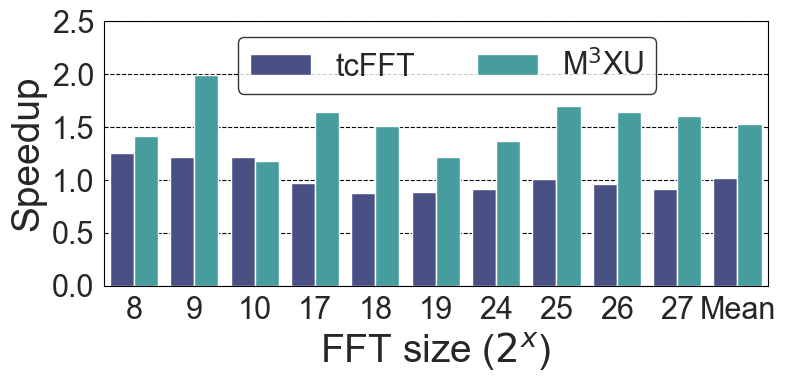

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

import numpy as np

fft_result = pd.read_csv("result_isca.csv")
fft_result['fft_size'] = np.log2(fft_result['fft_size'])
fft_result['fft_size'] = fft_result['fft_size'].astype(int)
def getSpeedup(data):
    speedups = []
    for _, row in data.iterrows():
        speedup = data['runtime'][(data['fft_size'] == row['fft_size']) & (data['operation'].str.contains('cufft'))] / row['runtime'] 
        speedups.append(float(speedup))
    data['speedup'] = speedups
    for op in data['operation'].unique():
        print(op)
        mean = data[data['operation'].str.contains(op)]['speedup'].mean()
        data.loc[len(data.index)] = [op,'Mean',0,0,0,mean]

getSpeedup(fft_result)
fft_result = fft_result.replace(to_replace='cufft', value='cuFFT', regex=True)
fft_result = fft_result.replace(to_replace='tcfft', value='tcFFT', regex=True)
fft_result = fft_result.replace(to_replace='mpmxufft', value='M$^3$XU', regex=True)

# fft_result['fft_size'] = np.log2(fft_result['fft_size'])

custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)
dd = fft_result[~(fft_result['operation'].str.contains('cuFFT'))]
g = sns.catplot(
        data=dd, kind="bar",hue="operation",
        x="fft_size", y="speedup", palette="mako", alpha=1, height=3,aspect=3
    )
# plt.ylim(0, max(dd['speedup'])*1.05)
# g.despine(left=True)
g.set_axis_labels("FFT size ($2^{x}$)", "Speedup",fontsize=28)
# g.set_yticklabels([str(i*0.2) for i in range(0,5)], size = 22)
g.set_xticklabels(rotation=0,fontsize=22)
g.set_yticklabels(fontsize=22)
ax = plt.gca()  # get current axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
plt.tight_layout(pad=20)
sns.move_legend(g, "upper center",bbox_to_anchor=(0.5, 0.95), ncol=3, title=None, frameon=True,fontsize=22,edgecolor='black')
fig = g.figure
fig.set_figwidth(8)
fig.set_figheight(3.5)
fig.savefig('/nfshome/yuz057/2023MICRO-MPCMXU/Figures/FFT.pdf',bbox_inches='tight')
fft_result.to_csv('fft_speedup.csv',index=False)



In [12]:
fft_result['fft_size']

0           256
1           256
2           256
3           512
4           512
5           512
6          1024
7          1024
8          1024
9        131072
10       131072
11       131072
12       262144
13       262144
14       262144
15       524288
16       524288
17       524288
18     16777216
19     16777216
20     16777216
21     33554432
22     33554432
23     33554432
24     67108864
25     67108864
26     67108864
27    134217728
28    134217728
29    134217728
30         Mean
31         Mean
32         Mean
Name: fft_size, dtype: object